In [1]:
import nltk
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
import matplotlib.pyplot

In [2]:
#fname_all_anecdotal_sents = "/home/shirish/BTECHSEM2/project/Book/anecdotal_sents/all_anecdotes.txt"
#fname_all_non_anecdotal_sents = "/home/shirish/BTECHSEM2/project/Book/non_anecdotal_sents/all_non_anecdotal.txt"
fname_all_anecdotal_sents = "/home/shirish/BTECHSEM2/project/books/stories/new_complete_stories.txt"
fname_all_non_anecdotal_sents = "/home/shirish/BTECHSEM2/project/books/annotated_books/stories_without_anecdotes/new_all_stories.txt2"
#fname_all_stories_sents = "/home/shirish/BTECHSEM2/project/books/combined_book/all_stories.txt"
#fname_buffet_sents = "/home/shirish/BTECHSEM2/project/books/buffet_en.txt"
imp_cols = ["POS", "NNP", "VBD", "VBG", "PRP", "VBZ"]
#imp_cols = ["POS", "NNP", "VBD", "VBG", "PRP", "CC"]
#imp_cols = ["CC","DT","NN","PDT","POS","UH"]

In [3]:
def tokenize(fname):
    """
    @param fname = filename
    Returns = list of sentences, where each sentence is a list of POS tagged words
    """
    f = open(fname, "r")
    taggedSents = []
    s = f.read()
    s = unicode(s, errors="ignore")
    sentences = nltk.sent_tokenize(s)
    for i in sentences:
        taggedSents.append(nltk.pos_tag(nltk.word_tokenize(i)))
    return taggedSents

In [18]:
f = open("filename.txt", "r")

In [20]:
#Read string from file
s = f.read()
s = unicode(s, errors="ignore")
#list of sentences
sentences = nltk.sent_tokenize(s)
#list of POS Tagged Sentences
tagged_sentences = []
for i in sentences:
    tagged_sentences.append(nltk.pos_tag(nltk.word_tokenize(i)))
df = featureset_df(tagged_sentences, 0, imp_cols)
# Array of 0, 1 values
predicted = model.predict(df)



shirish



In [4]:
def featureset_df(taggedSents, value, imp_cols):
    """
    This function returns a dataframe consisting of the imp_cols and target column after
    removing the NaN values
    @param taggedSents = list of sentences, where each sentence is a list of POS tagged words
    @param value = Value given to the target column in the dataframe
    Returns = dataframe with columns as imp_cols and target with value @param value
    """
    sents1 = []
    for i in taggedSents:
        l = {}
        for j in i:
            if j[1].isalpha():
                # If Noun
                if False and j[1][0] == "NNP":# or j[1] == "PRP":
                    l["NNP"] = 1
                else:
                    l[j[1]] = 1
        sents1.append(l)
    df = pd.DataFrame(sents1)
    df.fillna(0, inplace=True)
    features = df[imp_cols]
    #features = df
    features["target"] = value
    return features

## Important Columns
 * VB : Verb
 * VBD : Past Tense Verb
 * VBG : Gerund
 * VBN : Past Participle
 * VBP : Present Tense not 3rd person singular
 * VBZ : Present Tense 3rd person singular

In [5]:
def tagSentences():
    """
    This function returns two tagged sentences list
    ie List of non_anecdotal , list of anecdotal sentences
    """
    taggedSents1 = tokenize(
    fname_all_anecdotal_sents)
    taggedSents0 = tokenize(
    fname_all_non_anecdotal_sents)
    return taggedSents0, taggedSents1
    

In [6]:
def create_feature_set_df(taggedSents0, taggedSents1):
    """
    Call this function after calling tagSentences()
    This function returns the features dataframe
    """
    features0 = featureset_df(taggedSents0, 0, imp_cols)
    if(taggedSents1 is not None):
        features1 = featureset_df(taggedSents1, 1, imp_cols)
        features = pd.concat([features1, features0])
    else:
        features = features0
    return features
    

In [7]:
TS0, TS1 = tagSentences()
df = create_feature_set_df(TS0, TS1)


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [8]:
df.head(1)

,POS,NNP,VBD,VBG,PRP,VBZ,target
0,1.0,1.0,0.0,1.0,1.0,1.0,1


In [146]:
df.target.value_counts()

0    825
1    603
Name: target, dtype: int64

In [203]:
m1 = xgb.XGBClassifier(n_estimators=100)
#m1 = SVC(kernel='linear')
#m1 = retmodel([5, 5, 5, 1, 2, 5, 1])

In [204]:
for i in range(5):
    #model = retmodel([5, 5, 5, 1, 2, 5, 1])
    df = shuffle(df.copy())
    rfe1 = RFE(m1,6)
    rfe1 = rfe1.fit(df[[u'CC', u'CD', u'DT', u'EX',  u'IN', u'JJ', u'JJR', u'JJS', u'MD',
           u'NN', u'NNP', u'NNPS', u'NNS', u'PDT', u'POS', u'PRP', u'RB', u'RBR',
           u'RBS', u'RP', u'TO', u'UH', u'VB', u'VBD', u'VBG', u'VBN', u'VBP',
           u'VBZ', u'WDT', u'WP', u'WRB']], df.target)
    #rfe1 = rfe1.fit(df[imp_cols], df.target)
    for k,v in enumerate(rfe1.ranking_):
        if rfe1.support_[k]:
            print df.columns[k]
    print ""

CC
DT
NN
PDT
POS
UH

CC
DT
NN
PDT
POS
UH

CC
DT
NN
PDT
POS
UH

CC
DT
NN
PDT
POS
UH

CC
DT
NN
PDT
POS
UH



In [211]:
#m2 = retmodel([5, 5, 5, 1, 2, 5, 1])
m2 = xgb.XGBClassifier(n_estimators=100)

In [212]:
m2.fit(X_train, y_train)
predicted = m2.predict(X_test)
accuracy_score(predicted, y_test)

0.6503496503496503

In [120]:
rfe1.ranking_

array([ 1,  9,  1, 25, 20, 10,  7, 23, 14, 27,  1, 28, 18,  8,  2,  4, 11,
       24, 22, 12, 21, 29,  3,  6, 17, 19, 13,  5, 16, 26, 15])

In [121]:
rfe1.support_

array([ True, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [122]:
#for k,v in enumerate(df.columns):
#    print k,v

0 CC
2 DT
10 NN


In [15]:
df = shuffle(df)
#X_train, X_test, y_train, y_test = train_test_split(df[[u'CC', u'CD', u'DT', u'EX',  u'IN', u'JJ', u'JJR', u'JJS', u'MD',
#       u'NN', u'NNP', u'NNPS', u'NNS', u'PDT', u'POS', u'PRP', u'RB', u'RBR',
#       u'RBS', u'RP', u'TO', u'UH', u'VB', u'VBD', u'VBG', u'VBN', u'VBP',
#       u'VBZ', u'WDT', u'WP', u'WRB']], df["target"], test_size=0.25)
X_train, X_test, y_train, y_test = train_test_split(df[imp_cols], df["target"], test_size=0.1)

0.7030812324929971


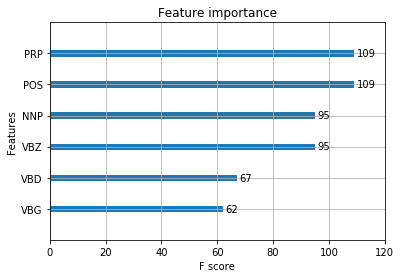

In [163]:
import xgboost as xgb
xgm = xgb.XGBClassifier()
xgm = xgm.fit(X_train, y_train)
print xgm.score(X_test, y_test)
xgb.plot_importance(xgm)

In [117]:
def svm_eval(X_train, y_train, X_test, y_test):
    model = SVC(kernel='rbf')
    model.fit(X_train, y_train)
    return model
    #predicted = model.predict(X_test)
    #print accuracy_score(predicted, y_test)

In [118]:
for i in range(20):
    global df
    df = shuffle(df)
    X_train, X_test, y_train, y_test = train_test_split(df[imp_cols], df["target"], test_size=0.25)
    a = svm_eval(X_train, y_train, X_test, y_test)
    nplm

NameError: name 'nplm' is not defined

In [151]:
def rf_eval(X_train, y_train, X_test, y_test):
    model = RandomForestClassifier(n_estimators=100)
    model.fit(X_train, y_train)
   

In [152]:
rf_eval(X_train, y_train, X_test, y_test)

In [153]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
accuracy_score(predicted, y_test)


0.7366946778711485

In [154]:
model.feature_importances_

array([0.24685267, 0.02821757, 0.60115681, 0.03429555, 0.0485749 ,
       0.0409025 ])

In [155]:
model = VotingClassifier(estimators=[('SVM', SVC()),
                                     ('XGB', xgb.XGBClassifier()),
                                     ('RF', RandomForestClassifier())
                                    ])

In [124]:
model.fit(X_train, y_train)

VotingClassifier(estimators=[('SVM', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)), ('XGB', XGBClassifier(base_score=0.5, booster='gbtree...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [125]:
model.score(X_test, y_test)

0.7067510548523207

In [126]:
l = [
    [],
    [],
    [],
    [],
]

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
wlist = [[ 4 , 4 , 4 , 0 , 1 , 4 , 1 ],
[ 1 , 4 , 2 , 0 , 1 , 4 , 2 ],
[ 4 , 4 , 4 , 0 , 1 , 5 , 1 ],
[ 4 , 4 , 4 , 0 , 1 , 5 , 2 ],
[ 4 , 4 , 4 , 0 , 2 , 4 , 1 ],
[ 4 , 4 , 4 , 0 , 2 , 4 , 2 ],
[ 4 , 4 , 4 , 0 , 2 , 5 , 1 ],
[ 4 , 4 , 4 , 0 , 2 , 5 , 2 ]]

In [12]:
wtslist = [[ 4 , 4 , 4 , 0 , 1 , 4 , 1 ],
[ 4 , 4 , 4 , 0 , 1 , 4 , 2 ],
[ 4 , 4 , 4 , 0 , 1 , 5 , 1 ],
[ 4 , 4 , 4 , 0 , 1 , 5 , 2 ],
[ 4 , 4 , 4 , 0 , 2 , 4 , 1 ],
[ 4 , 4 , 4 , 0 , 2 , 4 , 2 ],
[ 4 , 4 , 4 , 0 , 2 , 5 , 1 ],
[ 4 , 4 , 4 , 0 , 2 , 5 , 2 ],
[ 4 , 4 , 4 , 1 , 1 , 4 , 1 ],
[ 4 , 4 , 4 , 1 , 1 , 4 , 2 ],
[ 4 , 4 , 4 , 1 , 1 , 5 , 1 ],
[ 4 , 4 , 4 , 1 , 1 , 5 , 2 ],
[ 4 , 4 , 4 , 1 , 2 , 4 , 1 ],
[ 4 , 4 , 4 , 1 , 2 , 4 , 2 ],
[ 4 , 4 , 4 , 1 , 2 , 5 , 1 ],
[ 4 , 4 , 4 , 1 , 2 , 5 , 2 ],
[ 4 , 4 , 5 , 0 , 1 , 4 , 1 ],
[ 4 , 4 , 5 , 0 , 1 , 4 , 2 ],
[ 4 , 4 , 5 , 0 , 1 , 5 , 1 ],
[ 4 , 4 , 5 , 0 , 1 , 5 , 2 ],
[ 4 , 4 , 5 , 0 , 2 , 4 , 1 ],
[ 4 , 4 , 5 , 0 , 2 , 4 , 2 ],
[ 4 , 4 , 5 , 0 , 2 , 5 , 1 ],
[ 4 , 4 , 5 , 0 , 2 , 5 , 2 ],
[ 4 , 4 , 5 , 1 , 1 , 4 , 1 ],
[ 4 , 4 , 5 , 1 , 1 , 4 , 2 ],
[ 4 , 4 , 5 , 1 , 1 , 5 , 1 ],
[ 4 , 4 , 5 , 1 , 1 , 5 , 2 ],
[ 4 , 4 , 5 , 1 , 2 , 4 , 1 ],
[ 4 , 4 , 5 , 1 , 2 , 4 , 2 ],
[ 4 , 4 , 5 , 1 , 2 , 5 , 1 ],
[ 4 , 4 , 5 , 1 , 2 , 5 , 2 ],
[ 4 , 5 , 4 , 0 , 1 , 4 , 1 ],
[ 4 , 5 , 4 , 0 , 1 , 4 , 2 ],
[ 4 , 5 , 4 , 0 , 1 , 5 , 1 ],
[ 4 , 5 , 4 , 0 , 1 , 5 , 2 ],
[ 4 , 5 , 4 , 0 , 2 , 4 , 1 ],
[ 4 , 5 , 4 , 0 , 2 , 4 , 2 ],
[ 4 , 5 , 4 , 0 , 2 , 5 , 1 ],
[ 4 , 5 , 4 , 0 , 2 , 5 , 2 ],
[ 4 , 5 , 4 , 1 , 1 , 4 , 1 ],
[ 4 , 5 , 4 , 1 , 1 , 4 , 2 ],
[ 4 , 5 , 4 , 1 , 1 , 5 , 1 ],
[ 4 , 5 , 4 , 1 , 1 , 5 , 2 ],
[ 4 , 5 , 4 , 1 , 2 , 4 , 1 ],
[ 4 , 5 , 4 , 1 , 2 , 4 , 2 ],
[ 4 , 5 , 4 , 1 , 2 , 5 , 1 ],
[ 4 , 5 , 4 , 1 , 2 , 5 , 2 ],
[ 4 , 5 , 5 , 0 , 1 , 4 , 1 ],
[ 4 , 5 , 5 , 0 , 1 , 4 , 2 ],
[ 4 , 5 , 5 , 0 , 1 , 5 , 1 ],
[ 4 , 5 , 5 , 0 , 1 , 5 , 2 ],
[ 4 , 5 , 5 , 0 , 2 , 4 , 1 ],
[ 4 , 5 , 5 , 0 , 2 , 4 , 2 ],
[ 4 , 5 , 5 , 0 , 2 , 5 , 1 ],
[ 4 , 5 , 5 , 0 , 2 , 5 , 2 ],
[ 4 , 5 , 5 , 1 , 1 , 4 , 1 ],
[ 4 , 5 , 5 , 1 , 1 , 4 , 2 ],
[ 4 , 5 , 5 , 1 , 1 , 5 , 1 ],
[ 4 , 5 , 5 , 1 , 1 , 5 , 2 ],
[ 4 , 5 , 5 , 1 , 2 , 4 , 1 ],
[ 4 , 5 , 5 , 1 , 2 , 4 , 2 ],
[ 4 , 5 , 5 , 1 , 2 , 5 , 1 ],
[ 4 , 5 , 5 , 1 , 2 , 5 , 2 ],
[ 5 , 4 , 4 , 0 , 1 , 4 , 1 ],
[ 5 , 4 , 4 , 0 , 1 , 4 , 2 ],
[ 5 , 4 , 4 , 0 , 1 , 5 , 1 ],
[ 5 , 4 , 4 , 0 , 1 , 5 , 2 ],
[ 5 , 4 , 4 , 0 , 2 , 4 , 1 ],
[ 5 , 4 , 4 , 0 , 2 , 4 , 2 ],
[ 5 , 4 , 4 , 0 , 2 , 5 , 1 ],
[ 5 , 4 , 4 , 0 , 2 , 5 , 2 ],
[ 5 , 4 , 4 , 1 , 1 , 4 , 1 ],
[ 5 , 4 , 4 , 1 , 1 , 4 , 2 ],
[ 5 , 4 , 4 , 1 , 1 , 5 , 1 ],
[ 5 , 4 , 4 , 1 , 1 , 5 , 2 ],
[ 5 , 4 , 4 , 1 , 2 , 4 , 1 ],
[ 5 , 4 , 4 , 1 , 2 , 4 , 2 ],
[ 5 , 4 , 4 , 1 , 2 , 5 , 1 ],
[ 5 , 4 , 4 , 1 , 2 , 5 , 2 ],
[ 5 , 4 , 5 , 0 , 1 , 4 , 1 ],
[ 5 , 4 , 5 , 0 , 1 , 4 , 2 ],
[ 5 , 4 , 5 , 0 , 1 , 5 , 1 ],
[ 5 , 4 , 5 , 0 , 1 , 5 , 2 ],
[ 5 , 4 , 5 , 0 , 2 , 4 , 1 ],
[ 5 , 4 , 5 , 0 , 2 , 4 , 2 ],
[ 5 , 4 , 5 , 0 , 2 , 5 , 1 ],
[ 5 , 4 , 5 , 0 , 2 , 5 , 2 ],
[ 5 , 4 , 5 , 1 , 1 , 4 , 1 ],
[ 5 , 4 , 5 , 1 , 1 , 4 , 2 ],
[ 5 , 4 , 5 , 1 , 1 , 5 , 1 ],
[ 5 , 4 , 5 , 1 , 1 , 5 , 2 ],
[ 5 , 4 , 5 , 1 , 2 , 4 , 1 ],
[ 5 , 4 , 5 , 1 , 2 , 4 , 2 ],
[ 5 , 4 , 5 , 1 , 2 , 5 , 1 ],
[ 5 , 4 , 5 , 1 , 2 , 5 , 2 ],
[ 5 , 5 , 4 , 0 , 1 , 4 , 1 ],
[ 5 , 5 , 4 , 0 , 1 , 4 , 2 ],
[ 5 , 5 , 4 , 0 , 1 , 5 , 1 ],
[ 5 , 5 , 4 , 0 , 1 , 5 , 2 ],
[ 5 , 5 , 4 , 0 , 2 , 4 , 1 ],
[ 5 , 5 , 4 , 0 , 2 , 4 , 2 ],
[ 5 , 5 , 4 , 0 , 2 , 5 , 1 ],
[ 5 , 5 , 4 , 0 , 2 , 5 , 2 ],
[ 5 , 5 , 4 , 1 , 1 , 4 , 1 ],
[ 5 , 5 , 4 , 1 , 1 , 4 , 2 ],
[ 5 , 5 , 4 , 1 , 1 , 5 , 1 ],
[ 5 , 5 , 4 , 1 , 1 , 5 , 2 ],
[ 5 , 5 , 4 , 1 , 2 , 4 , 1 ],
[ 5 , 5 , 4 , 1 , 2 , 4 , 2 ],
[ 5 , 5 , 4 , 1 , 2 , 5 , 1 ],
[ 5 , 5 , 4 , 1 , 2 , 5 , 2 ],
[ 5 , 5 , 5 , 0 , 1 , 4 , 1 ],
[ 5 , 5 , 5 , 0 , 1 , 4 , 2 ],
[ 5 , 5 , 5 , 0 , 1 , 5 , 1 ],
[ 5 , 5 , 5 , 0 , 1 , 5 , 2 ],
[ 5 , 5 , 5 , 0 , 2 , 4 , 1 ],
[ 5 , 5 , 5 , 0 , 2 , 4 , 2 ],
[ 5 , 5 , 5 , 0 , 2 , 5 , 1 ],
[ 5 , 5 , 5 , 0 , 2 , 5 , 2 ],
[ 5 , 5 , 5 , 1 , 1 , 4 , 1 ],
[ 5 , 5 , 5 , 1 , 1 , 4 , 2 ],
[ 5 , 5 , 5 , 1 , 1 , 5 , 1 ],
[ 5 , 5 , 5 , 1 , 1 , 5 , 2 ],
[ 5 , 5 , 5 , 1 , 2 , 4 , 1 ],
[ 5 , 5 , 5 , 1 , 2 , 4 , 2 ],
[ 5 , 5 , 5 , 1 , 2 , 5 , 1 ],
[ 5 , 5 , 5 , 1 , 2 , 5 , 2 ]]

In [227]:
d2 = {}
for i in range(10):
    df = shuffle(df)
    X_train, X_test, y_train, y_test = train_test_split(df[imp_cols], df["target"], test_size=0.25)
    model = retmodel([5, 5, 5, 1, 2, 5, 1])
    model = model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    l1 = accuracy_score(predicted, y_test)
    #l.append(l1)
    #if d2.get(k1) is None:
    #    d2[k1] = [l1]
    #else:
    #    d2[k1].append(l1)
    #print k1, d2[k1], j
    eval1(SVC(), "SVM", X_train, y_train, X_test, y_test)
    eval1(xgb.XGBClassifier(), "XGB", X_train, y_train, X_test, y_test)
    eval1(LogisticRegression(), "LogisticRegression()", X_train, y_train, X_test, y_test)
    eval1(ExtraTreesClassifier(n_estimators=100), "ExtraTreesClassifier(n_estimators=100)", X_train, y_train, X_test, y_test)
    eval1(RandomForestClassifier(n_estimators=100), "RandomForest", X_train, y_train, X_test, y_test)
    eval1(AdaBoostClassifier(n_estimators=100), "AdaBoostClassifier(n_estimators=100)", X_train, y_train, X_test, y_test)
    eval1(MultinomialNB(), "MultinomialNB()", X_train, y_train, X_test, y_test)
    print "Ensemble", l1
    print ""
#print np.mean(l)
#print np.max(l)
#print np.std(l)

Ensemble 0.7310924369747899

Ensemble 0.7058823529411765

Ensemble 0.7226890756302521

Ensemble 0.7366946778711485

Ensemble 0.7226890756302521

Ensemble 0.6974789915966386

Ensemble 0.6974789915966386

Ensemble 0.7478991596638656

Ensemble 0.7254901960784313

Ensemble 0.6918767507002801



In [228]:
svmlist = [SVC() for i in range(10)]
enslist = [VotingClassifier(estimators=[('SVM', SVC(kernel='rbf')),
                                     ('XGB', xgb.XGBClassifier()),
                                         ('LG', LogisticRegression()),
                                         ('ExtraT', ExtraTreesClassifier(n_estimators=100)),
                                     ('RF', RandomForestClassifier(n_estimators=100)),
                                ('Ada', AdaBoostClassifier(n_estimators=100)),
                                    ('NB', MultinomialNB())
                                        ], weights=[5, 5, 5, 1, 2, 5, 1]) for j in range(10)]
d5 = {}
for i in range(20):
    df = shuffle(df)
    X_train, X_test, y_train, y_test = train_test_split(df[imp_cols], df["target"], test_size=0.10)
    m1 = svmlist[i]
    m2 = enslist[i]
    m1 = m1.fit(X_train, y_train)
    m2 = m2.fit(X_train, y_train)
    predicted1 = m1.predict(X_test)
    predicted2 = m2.predict(X_test)
    print "SVC", accuracy_score(predicted1, y_test)
    x1 = eval1(xgb.XGBClassifier(), "XGB", X_train, y_train, X_test, y_test)
    lr = eval1(LogisticRegression(), "LogisticRegression()", X_train, y_train, X_test, y_test)
    extT = eval1(ExtraTreesClassifier(n_estimators=100), "ExtraTreesClassifier(n_estimators=100)", X_train, y_train, X_test, y_test)
    rf1 = eval1(RandomForestClassifier(n_estimators=100), "RandomForest", X_train, y_train, X_test, y_test)
    adab1 = eval1(AdaBoostClassifier(n_estimators=100), "AdaBoostClassifier(n_estimators=100)", X_train, y_train, X_test, y_test)
    mnb = eval1(MultinomialNB(), "MultinomialNB()", X_train, y_train, X_test, y_test)
    ens1 =  accuracy_score(predicted2, y_test)
    
    
#print np.mean(l)
#print np.max(l)
#print np.std(l)

SVC 0.7132867132867133
SVC 0.6923076923076923
SVC 0.6713286713286714
SVC 0.7412587412587412
SVC 0.6363636363636364
SVC 0.7062937062937062
SVC 0.7272727272727273
SVC 0.7412587412587412
SVC 0.6783216783216783
SVC 0.7202797202797203


IndexError: list index out of range

In [245]:
while True:
    df = shuffle(df)
    X_train, X_test, y_train, y_test = train_test_split(df[imp_cols], df["target"], test_size=0.10)
    #svcacc, svcpred1 = eval1(SVC(kernel='rbf'), "SVC", X_train, y_train, X_test, y_test)
    #xgbacc, xgbpred1 = eval1(xgb.XGBClassifier(n_estimators=100), "XGB", X_train, y_train, X_test, y_test)
    #lgacc, lgpred1 = eval1(LogisticRegression(), "LG", X_train, y_train, X_test, y_test)
    #extacc, extpred1 = eval1(ExtraTreesClassifier(n_estimators=100), "ExtraT", X_train, y_train, X_test, y_test)
    #rfacc, rfpred1 = eval1(RandomForestClassifier(n_estimators=100), "RandomForest", X_train, y_train, X_test, y_test)
    #adaacc, adapred1 = eval1(AdaBoostClassifier(n_estimators=100), "ADA", X_train, y_train, X_test, y_test)
    #mnbacc, mnbpred1 = eval1(MultinomialNB(), "MNBayes", X_train, y_train, X_test, y_test)
    vcacc, vcpred1 = eval1(VotingClassifier(estimators=[('SVM', SVC(kernel='rbf')),
                                     ('XGB', xgb.XGBClassifier()),
                                     ('LG', LogisticRegression()),
                                     ('ExtraT', ExtraTreesClassifier(n_estimators=100)),
                                     ('RF', RandomForestClassifier(n_estimators=100)),
                                     ('Ada', AdaBoostClassifier(n_estimators=100)),
                                     ('NB', MultinomialNB())], weights=[5, 5, 5, 1, 2, 5, 1]), "VC", X_train, y_train, X_test, y_test)
    print vcacc
    if vcacc > 0.80:
        #print "Accuracy of VC: ", vcacc
        #print "Precision of VC: ", precision_score(vcpred1, y_test)
        #print "Recall of VC: ", recall_score(vcpred1, y_test)
        #print "F1-score of VC: ", f1_score(vcpred1, y_test)
        print "Accuracy of SVM: ", svcacc
        print "Precision of SVM: ", precision_score(svcpred1, y_test)
        print "Recall of SVM: ", recall_score(svcpred1, y_test)
        print "F1-score of SVM: ", f1_score(svcpred1, y_test)
        print "SVM Confusion Matrix: ", confusion_matrix(svcpred1, y_test)
        #plot_confusion_matrix("SVM Confusion Matrix", confusion_matrix(svcpred1, y_test))
        print "Accuracy of XGB: ", xgbacc
        print "Precision of XGB: ", precision_score(xgbpred1, y_test)
        print "Recall of XGB: ", recall_score(xgbpred1, y_test)
        print "F1-score of XGB: ", f1_score(xgbpred1, y_test)
        print "XGB Confusion Matrix: ", confusion_matrix(xgbpred1, y_test)
        #plot_confusion_matrix("XGBoost Confusion Matrix", confusion_matrix(xgbpred1, y_test))
        
        print "Accuracy of LG: ", lgacc
        print "Precision of LG: ", precision_score(lgpred1, y_test)
        print "Recall of LG: ", recall_score(lgpred1, y_test)
        print "F1-score of LG: ", f1_score(lgpred1, y_test)
        print "LG Confusion Matrix: ", confusion_matrix(lgpred1, y_test)
        #plot_confusion_matrix("Logistic Regression Confusion Matrix", confusion_matrix(lgpred1, y_test))
        
        print "Accuracy of ExtraT: ", extacc
        print "Precision of ExtraT: ", precision_score(extpred1, y_test)
        print "Recall of ExtraT: ", recall_score(extpred1, y_test)
        print "F1-score of ExtraT: ", f1_score(extpred1, y_test)
        print "ExtraT Confusion Matrix: ", confusion_matrix(extpred1, y_test)
        #plot_confusion_matrix("ExtraTreesClassifier Confusion Matrix", confusion_matrix(extpred1, y_test))
  
        print "Accuracy of RandomF: ", rfacc
        print "Precision of RandomF: ", precision_score(rfpred1, y_test)
        print "Recall of RandomF: ", recall_score(rfpred1, y_test)
        print "F1-score of RandomF: ", f1_score(rfpred1, y_test)
        print "RandomF Confusion Matrix: ", confusion_matrix(rfpred1, y_test)
        #plot_confusion_matrix("Random Forest Classifier Confusion Matrix", confusion_matrix(rfpred1, y_test))
        print "Accuracy of ADA: ", adaacc
        print "Precision of ADA: ", precision_score(adapred1, y_test)
        print "Recall of ADA: ", recall_score(adapred1, y_test)
        print "F1-score of ADA: ", f1_score(adapred1, y_test)
        print "ADA Confusion Matrix: ", confusion_matrix(adapred1, y_test)
        #plot_confusion_matrix("AdaBoost Confusion Matrix", confusion_matrix(adapred1, y_test))
        print "Accuracy of NB: ", mnbacc
        print "Precision of NB: ", precision_score(mnbpred1, y_test)
        print "Recall of NB: ", recall_score(mnbpred1, y_test)
        print "F1-score of NB: ", f1_score(mnbpred1, y_test)
        print "NB Confusion Matrix: ", confusion_matrix(mnbpred1, y_test)
        #plot_confusion_matrix("MultinomialNB Confusion Matrix", confusion_matrix(mnbpred1, y_test))
        print "Accuracy of VC: ", vcacc
        print "Precision of VC: ", precision_score(vcpred1, y_test)
        print "Recall of VC: ", recall_score(vcpred1, y_test)
        print "F1-score of VC: ", f1_score(vcpred1, y_test)
        print "VC Confusion Matrix: ", confusion_matrix(vcpred1, y_test)
        #plot_confusion_matrix("VotingClassifier Confusion Matrix", confusion_matrix(vcpred1, y_test))
        break


0.7777777777777778
0.7361111111111112
0.8194444444444444
Accuracy of SVM:  0.8194444444444444
Precision of SVM:  0.6333333333333333
Recall of SVM:  0.9047619047619048
F1-score of SVM:  0.7450980392156863
SVM Confusion Matrix:  [[40 11]
 [ 2 19]]
Accuracy of XGB:  0.8333333333333334
Precision of XGB:  0.6
Recall of XGB:  1.0
F1-score of XGB:  0.7499999999999999
XGB Confusion Matrix:  [[42 12]
 [ 0 18]]
Accuracy of LG:  0.8194444444444444
Precision of LG:  0.6333333333333333
Recall of LG:  0.9047619047619048
F1-score of LG:  0.7450980392156863
LG Confusion Matrix:  [[40 11]
 [ 2 19]]
Accuracy of ExtraT:  0.8333333333333334
Precision of ExtraT:  0.6
Recall of ExtraT:  1.0
F1-score of ExtraT:  0.7499999999999999
ExtraT Confusion Matrix:  [[42 12]
 [ 0 18]]
Accuracy of RandomF:  0.8333333333333334
Precision of RandomF:  0.6
Recall of RandomF:  1.0
F1-score of RandomF:  0.7499999999999999
RandomF Confusion Matrix:  [[42 12]
 [ 0 18]]
Accuracy of ADA:  0.8194444444444444
Precision of ADA:  0.

In [16]:
while True:
    df = shuffle(df)
    X_train, X_test, y_train, y_test = train_test_split(df[imp_cols], df["target"], test_size=0.05)
    #svcacc, svcpred1 = eval1(SVC(kernel='rbf'), "SVC", X_train, y_train, X_test, y_test)
    #xgbacc, xgbpred1 = eval1(xgb.XGBClassifier(n_estimators=100), "XGB", X_train, y_train, X_test, y_test)
    #lgacc, lgpred1 = eval1(LogisticRegression(), "LG", X_train, y_train, X_test, y_test)
    #extacc, extpred1 = eval1(ExtraTreesClassifier(n_estimators=100), "ExtraT", X_train, y_train, X_test, y_test)
    #rfacc, rfpred1 = eval1(RandomForestClassifier(n_estimators=100), "RandomForest", X_train, y_train, X_test, y_test)
    #adaacc, adapred1 = eval1(AdaBoostClassifier(n_estimators=100), "ADA", X_train, y_train, X_test, y_test)
    #mnbacc, mnbpred1 = eval1(MultinomialNB(), "MNBayes", X_train, y_train, X_test, y_test)
    vcacc, vcpred1, model = eval2(VotingClassifier(estimators=[('SVM', SVC(kernel='rbf')),
                                     ('XGB', xgb.XGBClassifier()),
                                     ('LG', LogisticRegression()),
                                     ('ExtraT', ExtraTreesClassifier(n_estimators=100)),
                                     ('RF', RandomForestClassifier(n_estimators=100)),
                                     ('Ada', AdaBoostClassifier(n_estimators=100)),
                                     ('NB', MultinomialNB())], weights=[5, 5, 5, 1, 2, 5, 1]), "VC", X_train, y_train, X_test, y_test)
    print vcacc
    if vcacc > 0.80:
          import cPickle
          cPickle.dump(model, open('model.pkl', 'wb'), -1)
          break


0.8055555555555556


In [ ]:
model = VotingClassifier(estimators=[('SVM', SVC(kernel='rbf')),
                                     ('XGB', xgb.XGBClassifier()),
                                     ('LG', LogisticRegression()),
                                     ('ExtraT', ExtraTreesClassifier(n_estimators=100)),
                                     ('RF', RandomForestClassifier(n_estimators=100)),
                                     ('Ada', AdaBoostClassifier(n_estimators=100)),
                                     ('NB', MultinomialNB())], weights=[5, 5, 5, 1, 2, 5, 1])

In [100]:
df['target'].value_counts()

0    825
1    603
Name: target, dtype: int64

In [57]:
for i in range(128):
    m1 = np.mean(d2[i])
    mx1 = np.max(d2[i])
    if mx1 >= .77:
        print i, mx1, m1

NameError: name 'd2' is not defined

In [58]:
mx = 0
index = 0
for i in range(128):
    m1 = np.mean(d2[i])
    if mx < m1:
        index = i
        mx = m1

NameError: name 'd2' is not defined

In [59]:
mx

0

In [60]:
wtslist[94]

[5, 4, 5, 1, 2, 5, 1]

In [61]:
df = shuffle(df)
X_train, X_test, y_train, y_test = train_test_split(df[imp_cols], df["target"], test_size=0.25)
model = retmodel([10, 8, 10, 2, 4, 10, 2])
model = model.fit(X_train, y_train)
predicted = model.predict(X_test)
a = accuracy_score(predicted, y_test)
print "Accuracy :", a
print "Precision :", precision_score(predicted, y_test)
print "Recall :", recall_score(predicted, y_test)
print "F1-Score :", f1_score(predicted, y_test)

NameError: name 'retmodel' is not defined

In [38]:
def retmodel(j):
    return VotingClassifier(estimators=[('SVM', SVC(kernel='rbf')),
                                     ('XGB', xgb.XGBClassifier()),
                                         ('LG', LogisticRegression()),
                                         ('ExtraT', ExtraTreesClassifier(n_estimators=100)),
                                     ('RF', RandomForestClassifier(n_estimators=100)),
                                ('Ada', AdaBoostClassifier(n_estimators=100)),
                                    ('NB', MultinomialNB())
                                        ], weights=j)

In [71]:
for i in range(10):
    print np.mean(d2[i]), np.max(d2[i])

0.7182072829131652 0.7478991596638656
0.7159663865546217 0.7450980392156863
0.7182072829131652 0.7478991596638656
0.7182072829131652 0.7478991596638656
0.7182072829131652 0.7478991596638656
0.7182072829131652 0.7478991596638656
0.7182072829131652 0.7478991596638656
0.7182072829131652 0.7478991596638656


KeyError: 8

In [72]:
d2

{0: [0.7170868347338936,
  0.7198879551820728,
  0.7338935574229691,
  0.7254901960784313,
  0.7478991596638656,
  0.6974789915966386,
  0.7002801120448179,
  0.7086834733893558,
  0.7226890756302521,
  0.7086834733893558],
 1: [0.7142857142857143,
  0.7226890756302521,
  0.7310924369747899,
  0.7198879551820728,
  0.7450980392156863,
  0.6946778711484594,
  0.7002801120448179,
  0.711484593837535,
  0.7170868347338936,
  0.7030812324929971],
 2: [0.7170868347338936,
  0.7198879551820728,
  0.7338935574229691,
  0.7254901960784313,
  0.7478991596638656,
  0.6974789915966386,
  0.7002801120448179,
  0.7086834733893558,
  0.7226890756302521,
  0.7086834733893558],
 3: [0.7170868347338936,
  0.7198879551820728,
  0.7338935574229691,
  0.7254901960784313,
  0.7478991596638656,
  0.6974789915966386,
  0.7002801120448179,
  0.7086834733893558,
  0.7226890756302521,
  0.7086834733893558],
 4: [0.7170868347338936,
  0.7198879551820728,
  0.7338935574229691,
  0.7254901960784313,
  0.7478991596

In [68]:
d3 = d2.copy()

In [216]:
def eval1(model, name, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    return accuracy_score(predicted, y_test), predicted
    

In [13]:
def eval2(model, name, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    return accuracy_score(predicted, y_test), predicted, model
    

In [66]:
import numpy as np

In [65]:
from sklearn.linear_model import LogisticRegression

In [36]:
model = LogisticRegression()

In [37]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
predicted = model.predict(X_test)
accuracy_score(predicted, y_test)

0.7394957983193278

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
model = AdaBoostClassifier(n_estimators=100)

In [41]:
model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=None)

In [101]:
df = shuffle(df)
X_train, X_test, y_train, y_test = train_test_split(df[imp_cols], df["target"], test_size=0.25)


In [43]:
predicted = model.predict(X_test)
accuracy_score(predicted, y_test)

0.6638655462184874

In [44]:
from sklearn.linear_model import LinearRegression

In [168]:
def plot_confusion_matrix(name, matrix):
    """
    Call this function after calling confusion_matrix_1()
    """  
    arr = list(m[0])
    arr.extend(list(m[1]))
    labels=['Actual: True, Predicted: True', 'Actual: False, Predicted: True', 'Actual: True, Predicted: False', 'Actual: False, Predicted: False']
    colors=['g','r','r','g']
    for i in range(4):
        plt.bar(i, arr[i], label=labels[i], color=colors[i])
    plt.legend()
    plt.ylabel("Test Sets")
    plt.xticks([i for i in range(4)], ["True Positives", "False Positives", "False Negatives", "True Negatives"])
    plt.title(name)
    plt.savefig(name)
    plt.show()
        

In [146]:
m = [[167 , 70] ,[ 38,  82]]


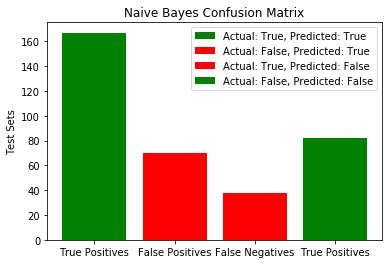

In [147]:
plot_confusion_matrix("Naive Bayes Confusion Matrix:", m)

In [29]:
def plot_heat_map_of_correlation():
    """
    Call this function after calling create_feature_set_df()
    """
    corrmat = df.corr()
    sns.heatmap(corrmat, cbar=True, annot=True)
    

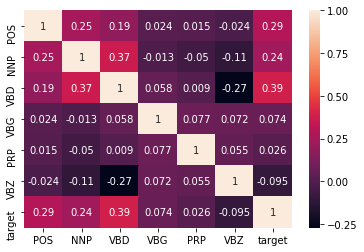

In [30]:
plot_heat_map_of_correlation()

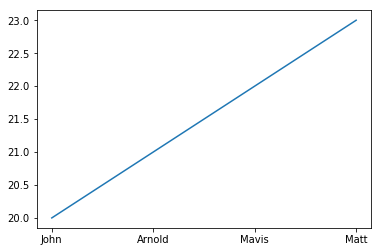

In [32]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([0,1,2,3])
y = np.array([20,21,22,23])
my_xticks = ['John','Arnold','Mavis','Matt']
plt.xticks(x, my_xticks)
plt.plot(x, y)
plt.show()

In [246]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [44]:
a = nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize("Google owns Facebook Incorporation.")))

In [42]:
from nltk.chunk import tree2conlltags

In [45]:
tree2conlltags(a)

[('Google', 'NNP', u'B-GPE'),
 ('owns', 'VBZ', u'O'),
 ('Facebook', 'NNP', u'B-PERSON'),
 ('Incorporation', 'NNP', u'I-PERSON'),
 ('.', '.', u'O')]

In [ ]:
#Read string from file
s = f.read()
s = unicode(s, errors="ignore")
#list of sentences
sentences = nltk.sent_tokenize(s)
#list of POS Tagged Sentences
tagged_sentences = []
for i in sentences:
    tagged_sentences.append(nltk.pos_tag(nltk.word_tokenize(i)))
df = featureset_df(tagged_sentences, 0, imp_cols)
# Array of 0, 1 values
predicted = model.predict(df)
starting_phrases = re.compile(
"^For example"|
"^Once upon a time"|
"^Long time ago"|
"^For instance"|
"^Let's take an example of"|
"^However"|
"^In"|
"^For"|
"^Another Example"|
"^Consider"|
"^Whenever"|
"^Take"
)
demonstrative_pronouns = re.compile(
"Such"|
"This"|
"That"|
"These"|
"Those"|
"Either"|
"Neither"
)
rule_based = []
for k,v in enumerate(sentences):
    v = v.strip()
    rule_based[k] = 0
    if demonstrative_pronouns.match(v) is None:
        rule_based[k] = 0
        if starting_phrases.match(v) is not None:
            rule_based[k] = 2
        else:
            a = st.tag(nltk.word_tokenize(v))
            for i in a:
                if i[1] == 'PERSON' or i[1] == "ORGANIZATION":
                    rule_based[k] = 1
                    break
# Heuristics
# Two arrays are predicted, rule_based
# Now where both are 1 or the addition of both >= 2 then that is a start of the anecdote
# If the number of sentences in the anecdotes is less than 3 then it's not an anecdote

# anecdotes array consists of start and end denoted by 1, -1
anecdotes = []
flag = 0
num_z = 0
anec_count = 0
for k, v in enumerate(zip(predicted, rule_based)):
    anecdote[k] = 0
    if v[0] + v[1] >= 2 and flag == 0:
        anec_count += 1
        flag = 1
        anecdotes[k] = 1
    elif flag == 1 and v[0] == 1:
        anec_count += 1         
    elif flag == 1 and v[0] == 0:
        num_z += 1
        if num_z >= 2:
            anecdote[k - 2] = -1
            flag = 0
            if anec_count < 2:
                anecdotes[k - 2] = 0
            anec_count = 0

# Now anecdotes contains start and end of the anecdotes based on 1 and -1 number
s1 = ""
h1 = ""
for i in anecdotes:
    if i == 1:
        s1 += "<story> "
        h1 += '<span style="color:red"> '
        h1 += i
        s1 += i
    elif i == -1:
        s1 += i
        h1 += i
        h1 += ' </span>'
        s1 += " </story>"
fout = open()




In [3]:
s = ' abcd"def"'

In [4]:
print s

 abcd"def"


In [46]:
from nltk.tag import StanfordNERTagger

In [65]:
st = StanfordNERTagger("/home/shirish/stanford-corenlp/stanford-ner-2018-02-27/classifiers/english.all.3class.distsim.crf.ser.gz",
                       "/home/shirish/stanford-corenlp/stanford-ner-2018-02-27/stanford-ner.jar",encoding='utf-8')

/usr/local/lib/python2.7/dist-packages/nltk/tag/stanford.py:183: DeprecationWarning: 
The StanfordTokenizer will be deprecated in version 3.2.5.
Please use nltk.tag.corenlp.CoreNLPPOSTagger or nltk.tag.corenlp.CoreNLPNERTagger instead.
  super(StanfordNERTagger, self).__init__(*args, **kwargs)


In [66]:
import os

In [67]:
os.environ['STANFORD_PARSER'] = '/home/shirish/stanford-corenlp/stanford-ner-2018-02-27/'
os.environ['STANFORD_MODELS'] = '/home/shirish/stanford-corenlp/stanford-ner-2018-02-27/'
os.environ['CLASSPATH'] = "/home/shirish/stanford-corenlp/stanford-ner-2018-02-27/:/home/shirish/stanford-corenlp/stanford-ner-2018-02-27/classifiers:/home/shirish/stanford-corenlp/stanford-ner-2018-02-27/lib"

In [71]:
st.tag("Rome is not built in a day".split())

[(u'Rome', u'LOCATION'),
 (u'is', u'O'),
 (u'not', u'O'),
 (u'built', u'O'),
 (u'in', u'O'),
 (u'a', u'O'),
 (u'day', u'O')]

In [1]:
l = []

In [2]:
l[0] = 1

IndexError: list assignment index out of range

In [5]:
import nltk


In [6]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [27]:
import re

In [55]:
demonstrative_pronouns = re.compile(
        "\sSuch\s|\sThis\s|\sThat\s|\sThese\s|\sThose\s|\sEither\s|\sNeither\s|\sHis\s|\sHer\s|\sThey\s|\sIt\s|\sShe\s|\sHe\s|\sThem\s|\sthemselves\s|\sherself\s|\shimself\s|\sWe\s", re.IGNORECASE)

In [56]:
demonstrative_pronouns.findall("In these  blinks, youll find out why subliminal messages can make you crave more popcorn; how fast computers contributed to a global financial market crisis; and why a majority of doctors may b")

[' these ']

In [63]:
    demonstrative_pronouns = demonstrative_pronouns = re.compile(
        "\sSuch\s|\s?This\s|\sThat\s|\sThese\s|\sThose\s|\sEither\s|\sNeither\s|\sHis\s|\sHer\s|\sThey\s|\sIt\s|\sShe\s|\sHe\s|\sThem\s|\sthemselves\s|\sherself\s|\shimself\s|\sWe\s|\sso\s", re.IGNORECASE)

In [65]:
demonstrative_pronouns.findall("This was certainly the case for legendary inventor.")

['This ']

In [30]:
print a

In [74]:
p = re.compile(r"\bShirish\b")

In [75]:
p.findall("abc Shirish abc")

['Shirish']

In [2]:
from gensim.summarization import summarize

In [5]:
text = '''What’s in it for me? Follow the making of a legendary investor.Besides Bill Gates and Mark Zuckerberg, Warren Buffett is probably one of the best-known billionaires in the world. With his low-key profile and homegrown style – he does his own taxes and wears slightly shabby suits – the “Sage of Omaha” is a beloved man, even among those who tend to have little sympathy for the super wealthy.
So who is Warren Buffett?
That’s what you’ll learn in these blinks. We follow Buffett from growing up in Omaha, through his early days in trading, to his years as the richest man in the world. And we get a glimpse of the unique investment sense he showed throughout his business life.
In these blinks, you’ll find out

that Buffett made his first stock trade as a child;
what investment philosophy has influenced all of Buffett’s investments; and
why Berkshire Hathaway is the company most associated with Buffett.
Warren Buffett grew up in the Midwestern city of Omaha, Nebraska. Money was often on his mind.Warren Edward Buffett was born to Howard and Leila Buffett on August 30, 1930, at a time when many families were facing an uncertain future.
As a child of the Great Depression, young Warren learned the value of money.
In 1932, when the Depression hit Warren’s hometown of Omaha, Nebraska, his father lost his job as a securities salesman for a local bank. But his dad was resourceful and soon began his own company, selling safe and reliable stocks and bonds.
Earnings were meager. Indeed, they could afford so little food that Warren’s mother would often give her portion to Howard so that he would have a decent meal.
These difficult times left a lasting impression on Warren Buffett, and fueled his desire for the kind of security and stability that money can buy. Even though his father’s business became successful when Warren was six, he never forgot those early Depression years.
It wasn’t long before Warren’s interest in investment and entrepreneurship revealed itself.
He always looked forward to visiting his father’s office, and, when Warren was ten, Howard took him on an exciting business trip to New York, where they visited the Stock Exchange.
A year later, when he was eleven, Warren made his first profit by buying and selling stocks along with his sister, Doris.
To afford these stocks, Warren had undertaken many entrepreneurial activities, such as roaming the local golf course to collect lost golf balls and then selling them back to the owner.
At the age of 14, Warren was in charge of five separate paper routes, which had him getting up early every morning, delivering papers and collecting subscription fees.
By saving every cent he made, Warren purchased 40 acres of land for $1,200. He wasn’t yet fifteen.
Warren was no slouch at school, either. He graduated in the top three percent and enrolled at the Wharton School of Finance and Commerce, in Pennsylvania, where his love of money would only grow.At Columbia Business School, Buffett met his mentor and began his investment career.With straight A’s as an undergrad, Buffett was surprised when his application for postgraduate studies was rejected by the Harvard Business School. But this rejection might have been for the best, since his professor at Columbia Business School (which accepted him) would have a massive impact on his life.'''

In [7]:
print summarize(text, ratio=0.5)

Follow the making of a legendary investor.Besides Bill Gates and Mark Zuckerberg, Warren Buffett is probably one of the best-known billionaires in the world.
We follow Buffett from growing up in Omaha, through his early days in trading, to his years as the richest man in the world.
that Buffett made his first stock trade as a child;
Warren Buffett grew up in the Midwestern city of Omaha, Nebraska.
Money was often on his mind.Warren Edward Buffett was born to Howard and Leila Buffett on August 30, 1930, at a time when many families were facing an uncertain future.
As a child of the Great Depression, young Warren learned the value of money.
In 1932, when the Depression hit Warren’s hometown of Omaha, Nebraska, his father lost his job as a securities salesman for a local bank.
These difficult times left a lasting impression on Warren Buffett, and fueled his desire for the kind of security and stability that money can buy.
Even though his father’s business became successful when Warren was

In [1]:
s = "Sample Text"

In [3]:
s = unicode(s, errors="ignore")

In [4]:
print s


Sample Text
